# **EDA FPT**

#### **I. Import and Load data**

In [2]:
# General
from vnstock import Quote
import pandas as pd
import numpy as np
import datetime
import sys
import os

# Statistics
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Visualization
from  statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sns.set_style('dark')
sns.set()

# utils
sys.path.append(os.path.abspath('..'))
from src.utils.get_data import get_stock, get_risk_free

In [ ]:
# Config 
START_DATE = '2007-01-01'
END_DATE = '2025-09-01'
#END_DATE = datetime.datetime.now().strftime('%Y-%m-%d')

In [5]:
# Get risk free
rf = 0.0

In [ ]:
# FPT data
df = get_stock('FPT', START_DATE, END_DATE)
df.shape

(4665, 8)

#### **II. EDA**

##### 1. Data strucure 

In [ ]:
df.head()

,time,open,high,low,close,volume,return,log_return
1,2007-01-03,10.85,11.09,10.85,11.09,74660,0.022120,0.021879
2,2007-01-04,11.64,11.64,11.64,11.64,148510,0.049594,0.048404
3,2007-01-05,12.20,12.20,12.20,12.20,377800,0.048110,0.046989
4,2007-01-08,12.57,12.57,12.08,12.08,351470,-0.009836,-0.009885
5,2007-01-09,12.20,12.20,12.08,12.08,225270,0.000000,0.000000


In [ ]:
df.isna().sum()

time          0
open          0
high          0
low           0
close         0
volume        0
return        0
log_return    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 1 to 4665
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        4665 non-null   datetime64[ns]
 1   open        4665 non-null   float64       
 2   high        4665 non-null   float64       
 3   low         4665 non-null   float64       
 4   close       4665 non-null   float64       
 5   volume      4665 non-null   int64         
 6   return      4665 non-null   float64       
 7   log_return  4665 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 291.7 KB


In [ ]:
df.describe(include='number')

,open,high,low,close,volume,return,log_return
count,4665.000000,4665.000000,4665.000000,4665.000000,4.665000e+03,4665.000000,4665.000000
mean,24.579284,24.840746,24.325563,24.577618,1.335223e+06,0.000656,0.000472
std,30.645200,30.962367,30.327552,30.639608,1.994535e+06,0.019190,0.019178
min,1.760000,1.860000,1.760000,1.820000,0.000000e+00,-0.069896,-0.072459
25%,5.290000,5.330000,5.230000,5.270000,2.575900e+05,-0.008637,-0.008675
50%,9.980000,10.090000,9.900000,9.980000,6.844800e+05,0.000000,0.000000
75%,27.910000,28.570000,27.340000,27.650000,1.631780e+06,0.009423,0.009379
max,132.870000,134.500000,132.260000,133.040000,2.351430e+07,0.069922,0.067586


##### 2. Price analysis

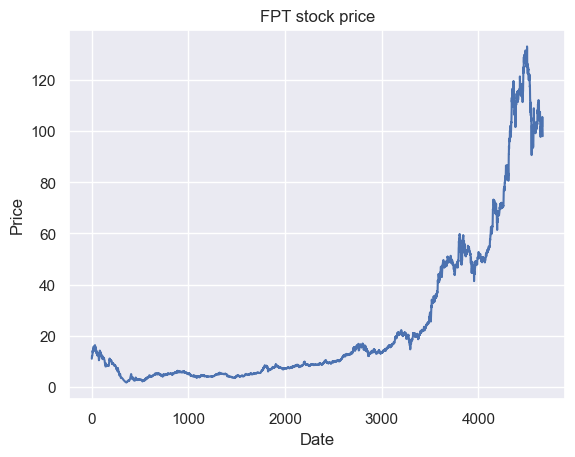

In [ ]:
plt.plot(df['close'])
plt.title('FPT stock price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

- Price seems to have a smoothly increasing momentum, and the speed is fast, which may be the reason why mean was so much higher than median.
- There are drops but quickly bounce back and increase afterwards.

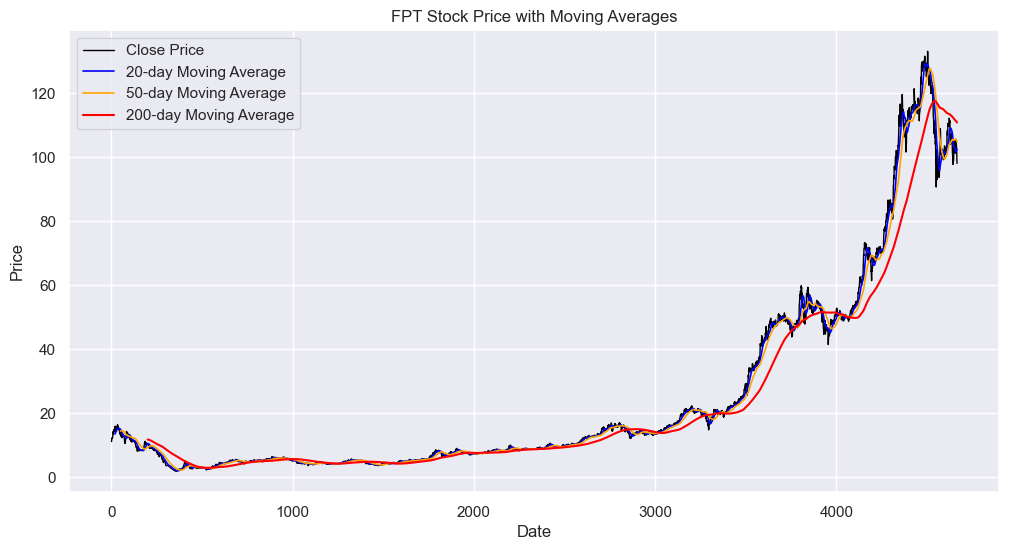

In [ ]:
# Overalying moving average
df['SMA20'] = df['close'].rolling(20).mean()
df['SMA50'] = df['close'].rolling(50).mean()   
df['SMA200'] = df['close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['close'], label='Close Price', color='black', linewidth=1)
plt.plot(df['SMA20'], label='20-day Moving Average', color='blue', linewidth=1.2)
plt.plot(df['SMA50'], label='50-day Moving Average', color='orange', linewidth=1.2)
plt.plot(df['SMA200'], label='200-day Moving Average', color='red', linewidth=1.5)

plt.title('FPT Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

- Overall, the long-term 200-day SMA show a sloping upward trend with very fast speed at the later stage.
- The first 3000 days of the data, the three line were hugging closely with each other, this indicate very stable, non changing speed, with a flat increasing trend.
- Later, the two short and medium term SMAs still hug very close to the price line => Relatively low volatility. Along with that, the 20 SMA and 50 SMA most of the time were above the red line of 200-day SMA, in the direction of the redline.  
=> Golden cross were seen on about the 3300th day. And after that, with only one short bearish signal perios, there are two long uptrend signal.  
=> Strong bullish signal.
- Recent price drop quite heavily, the same can be seen on the 3900 dayth but at a smaller scale. The scale can be seen to be correlated with the increase speed.  
=> Large change forllowed by large change => Volatility clustering (only two period of the patterns can be seen in the data, models may learn but maybe overfit, also since there is only two close to recent date showed the patterns, difficult to split to train test - loosing pattern in train => Maybe use model as auto retrain to check for this conclusion in the future while lower the trust (weight) of the model on bot decision)

In [ ]:
# Stationarity

# ADF test
adf_result = adfuller(df['close'])
print(f'ADF p-value: {adf_result[1]}')

print()

# KPSS test
kpss_result = kpss(df['close'], regression='ct')
print(f'KPSS p-value: {kpss_result[1]}')

ADF p-value: 0.9922001472840344

KPSS p-value: 0.01


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



For all data test:
- ADF: non-stationary
- KPSS: non-stationary  
=> Data  is definitely not stationary, however price seem to be increasing exponentially.
=> There is lack of extreme event so ADF test in this case is not meaningful.

In [ ]:
df['log_price'] = np.log(df['close'])

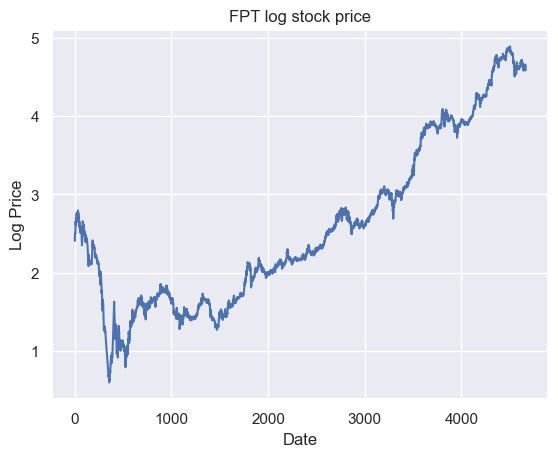

In [ ]:
plt.plot(df['log_price'])
plt.title('FPT log stock price')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.show()

In [ ]:
# Stationary test on log price

kpss_result = kpss(df['log_price'], regression='ct')
print(f'KPSS p-value: {kpss_result[1]}')

KPSS p-value: 0.01


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



Even with log price, the KPSS still show non-stationary, so the price are not stationary around a trend, the residuals not fluctuate around a stochastic upward linear trend but rather a random walk along it.

Price models using statistical models with assumption of stationarity is not good choices.

##### 9. Return analysis

In [ ]:
df.describe(include='number')[['return', 'log_return']]

,return,log_return
count,4665.000000,4665.000000
mean,0.000656,0.000472
std,0.019190,0.019178
min,-0.069896,-0.072459
25%,-0.008637,-0.008675
50%,0.000000,0.000000
75%,0.009423,0.009379
max,0.069922,0.067586


- Mean: 0.06%, Median: 0.0%, std: 1.9%
- Log return and mean return relatively close to 0, return not skewed.

In [ ]:
# Annual return
ann_return = (stats.gmean(1+df['return'])-1)*100*252
print(f'Annual return: {ann_return:.2f}%')

Annual return: 11.89%


In [ ]:
# Annual std
ann_std = df['return'].std() * np.sqrt(252) * 100
print(f'Annual std: {ann_std:.2f}%')

Annual std: 30.46%


=> Risky

In [ ]:
# Increase stage
df[3300:].describe(include='number')[['return', 'log_return']]

,return,log_return
count,1365.000000,1365.000000
mean,0.001422,0.001272
std,0.017301,0.017281
min,-0.069896,-0.072459
25%,-0.006614,-0.006636
50%,0.000892,0.000892
75%,0.009409,0.009365
max,0.069922,0.067586


- At this stage the mean of return and log return as well as median are closer together, showing non skewed (median close to mean) and small price gap (close value of mean return and mean log return) daily. 

Text(0.5, 1.0, 'FPT stock return')

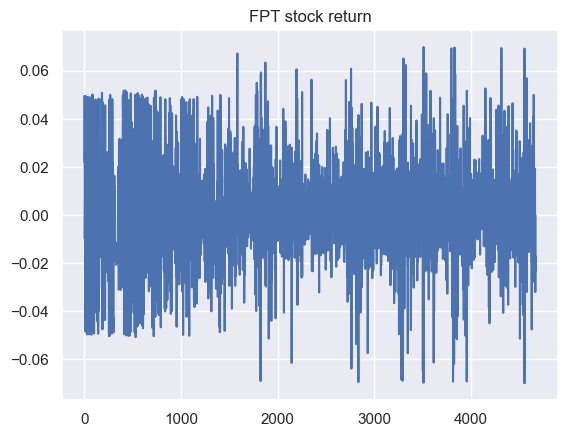

In [ ]:
# Plot return
plt.plot(df['return'])
plt.title('FPT stock return')

<Axes: >

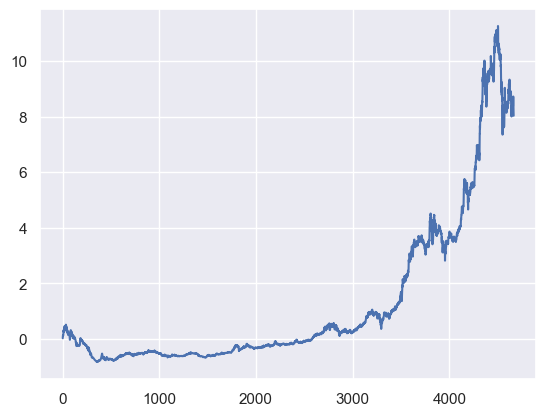

In [ ]:
# Cumulative return
cum_return = (1 + df['return']).cumprod() - 1
cum_return.plot()


Very high money growth.

<Axes: xlabel='return', ylabel='Count'>

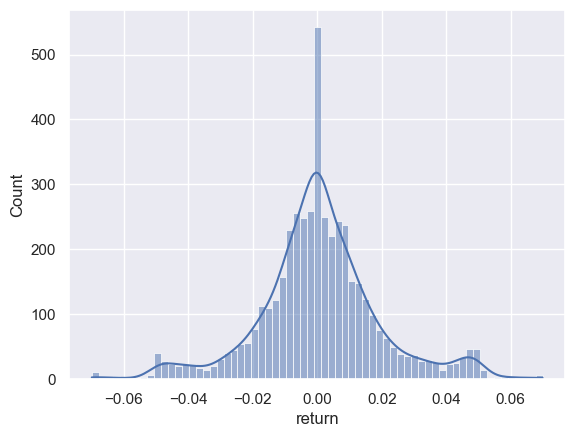

In [ ]:
sns.histplot(data=df['return'], kde=True)

Sharp peak, heavy tail.

In [ ]:
# Skewnes
print(f"Skewness: {stats.skew(df['return']):.2f}")

Skewness: 0.07


In [ ]:
# Kurtosis
print(f"Kurtosis: {df['return'].kurtosis() + 3:.2f}")

Kurtosis: 4.51


((array([-3.61777448, -3.38136273, -3.25100864, ...,  3.25100864,
          3.38136273,  3.61777448], shape=(4665,)),
  array([-0.06989634, -0.06988602, -0.06976744, ...,  0.06948459,
          0.06966527,  0.06992187], shape=(4665,))),
 (np.float64(0.01884886335153223),
  np.float64(0.0006558221750205834),
  np.float64(0.9816295084144925)))

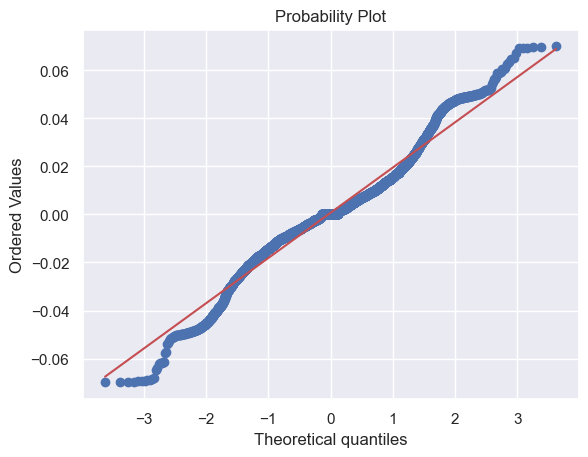

In [ ]:
# Q-Q plot
stats.probplot(df['return'], dist="norm", plot=plt)

- No extreme value
- Clear distribution of sharp peak, heavy tails, no skewness.

In [ ]:
# Sharpe ratio
print(f'sharpe_ratio: {(ann_return-rf) / ann_std:.2f}')

sharpe_ratio: 0.39


In [ ]:
# Sortino ratio
sortino_ratio = (ann_return- rf) / (df['return'][df['return'] < 0].std() * np.sqrt(252)*100)
print(f"Sortino ratio: {sortino_ratio:.2f}")

Sortino ratio: 0.57


- Sortino above Sharpe => Downside risk is less punishing than upside risk.

In [ ]:
# Max drawdown (MDD)
mdd = ((df['close'].cummax() - df['close']) / df['close'].cummax()).max()
print(f'MDD ratio: {mdd*100:.2f}%')

MDD ratio: 88.90%


In [ ]:
mdd_late = ((df['close'][3300:].cummax() - df['close'][3300:]) / df['close'][3300:].cummax()).max()
print(f'MDD ratio late: {mdd_late*100:.2f}%')

MDD ratio late: 31.89%


At early stage, the MDD is large since price were not high at first then drop to flatly low. Later up to recently, the worst loss would be 31.89%. => Somewhere in the last 5 years, there is a loss of 1/3 values if the portfolio is FPT alone.

In [ ]:
# ADF
adf_result = adfuller(df['return'])
print(f'ADF p-value: {adf_result[1]}')

print()

# KPSS
kpss_result = kpss(df['return'], regression='c')
print(f'KPSS p-value: {kpss_result[1]}')

ADF p-value: 2.2826325300215332e-30

KPSS p-value: 0.06931341683701348


ADF: Stationary  
KPSS: Stationary in contant trend.  
=> Enough evidence that data reject unit root, data fluctuate around a mean and volatility does not increase in time.  
=> Data is stationary => Stationary assumed models is usable.

##### 4. Autocorelation test

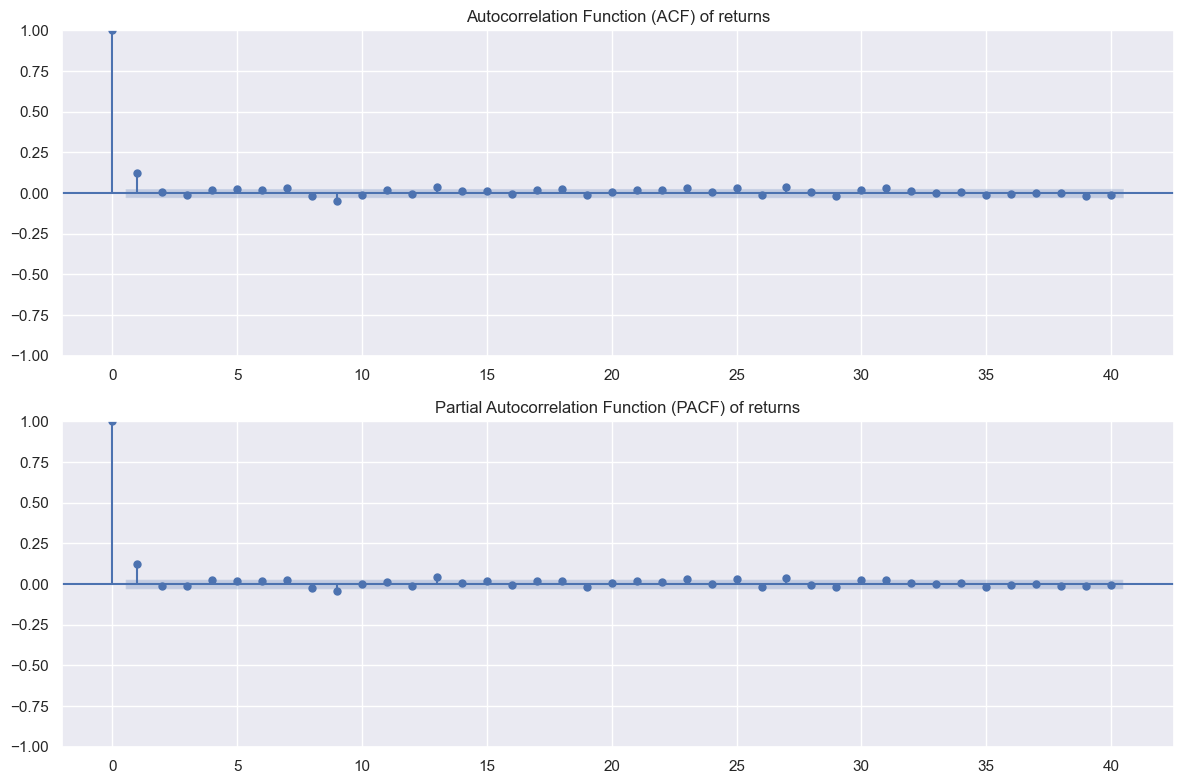

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['return'], lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) of returns')

plot_pacf(df['return'], lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) of returns')

plt.tight_layout()
plt.show()

- Lag 1: highly positive => Momentum (today up, tomorrow likely up), with upward trend as shown in visualization.
- Lag 9: negative => But very tiny correlation. << 0.05
- Lag 13: positive => But very tiny correlation.

=> Mostly whitenoise => ARM\AR... models not approprite.

In [ ]:
# Ljung-Box test
lb_result = acorr_ljungbox(df['return'], lags=[1, 9, 13], return_df=True)
print(f"Return:\n {lb_result}")

print()

# Ljung-Box test for squared returns
lb_result = acorr_ljungbox(df['return']**2, lags=[10, 20, 30], return_df=True)
print(f"Return squared:\n {lb_result}")

Return:
        lb_stat     lb_pvalue
1    73.236373  1.150165e-17
9    96.630988  7.541223e-17
13  105.211153  1.610926e-16

Return squared:
         lb_stat  lb_pvalue
10  3042.624867        0.0
20  4487.874537        0.0
30  5494.246430        0.0


- Auto correlation confiremed statistically since there are alot of data points, however as shown in ACF plot, auto correlation is not economically significant (Very small negative at lags = 8)
- Squared returns are dependent (close day has similar change size that eliminate each other lead to white noise patterns for large lag) => Volatility clustering => May somewhat proved the idea of the rebounce size scale previously said.

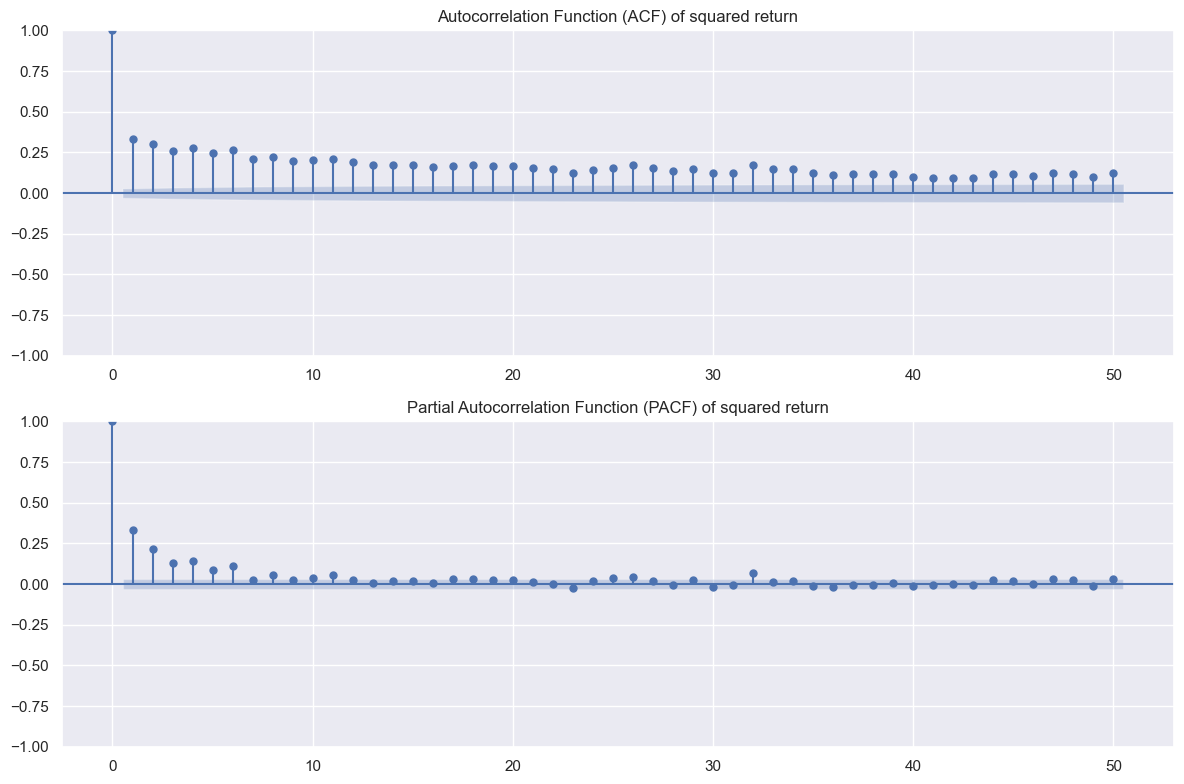

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['return']**2, lags=50, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) of squared return')

plot_pacf(df['return']**2, lags=50, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) of squared return')

plt.tight_layout()
plt.show()

There is significant upto 32 => Volatility clustering, ARCH/GARCH.

##### 5. Risk analysis

Value at Risk

In [ ]:
# Parametric
mu = df['return'].mean()
sigma = df['return'].std()

confidence = 0.95
z = stats.norm.ppf((1 - confidence))

VaR_95 = mu + z * sigma
print(f"Parametric 95%: {VaR_95*100:.2f}%")

# Histrorical Simulation
Var_95_hist = np.percentile(df['return'], 5) # 5% quantile
print(f"Historical 95%: {Var_95_hist*100:.2f}%")

Parametric 95%: -3.09%
Historical 95%: -3.17%


Pretty close since the distribution is close to normal.

So at 95% confidence level the VaR equals around -3.1% or there is 5% of the day the loss would be higher than -3.1%.

In [ ]:
# CVaR
CVaR_95 = df[df['return'] <= VaR_95]['return'].mean()
print(f"95% CVaR: {CVaR_95*100:.2f}%")

95% CVaR: -4.42%


Tail risk analysis POT

In [ ]:
threshold = np.percentile(df['return'], 5)
extreme_losses = df[df['return'] <= threshold]['return']

print(f"Tail sample size: {len(extreme_losses)}")
print(f"Tail mean: {extreme_losses.mean()*100:.2f}%")
print(f"Max loss observed: {extreme_losses.min()*100:.2f}%")

Tail sample size: 234
Tail mean: -4.47%
Max loss observed: -6.99%


So the least loss is 3.1%, mean is 4.5% and the max loss is 7% which seem to be the same observed in a normal tail (mean closer to threshold than max loss).

##### 6. Seasonality & Event

In [ ]:
# Day-of-week effect
df['time'] = pd.to_datetime(df['time'])
df['day_of_week'] = df['time'].dt.day_name()

day_mean = df.groupby('day_of_week')['return'].agg(['mean', 'count', 'std']).sort_values(by='mean', ascending=False)
day_mean

,mean,count,std
day_of_week,,,
Wednesday,0.001770,939,0.019018
Friday,0.001293,936,0.018152
Tuesday,0.000767,935,0.019896
Thursday,0.000707,942,0.018202
Monday,-0.001310,913,0.020510


In [ ]:
# ANOVA
groups = [df.loc[df['day_of_week'] == d]['return']*100 for d in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]
f_stats, p_value = stats.f_oneway(*groups)
print(f"f-statistic: {f_stats}, p-value: {p_value}")

f-statistic: 3.460932711319618, p-value: 0.00787101028549485


There is enough evidence showing that there is at least 1 group different from other:
- Monday tend to be very close to 0 and more negative return.
- Tuesday and Thursday show mean of 0.07% while Friday and Wednesday show mean of more than 0.1%. => A one day slowdown in momentum.
- STD stably stay around 2%, so there would be alot of overlap in the distribution.

In [ ]:
# Post-hoc
turkey = pairwise_tukeyhsd(df['return'], df['day_of_week'])
print(turkey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
  Friday    Monday  -0.0026  0.029  -0.005 -0.0002   True
  Friday  Thursday  -0.0006 0.9644  -0.003  0.0018  False
  Friday   Tuesday  -0.0005 0.9762 -0.0029  0.0019  False
  Friday Wednesday   0.0005 0.9833 -0.0019  0.0029  False
  Monday  Thursday    0.002 0.1563 -0.0004  0.0044  False
  Monday   Tuesday   0.0021 0.1358 -0.0004  0.0045  False
  Monday Wednesday   0.0031  0.005  0.0006  0.0055   True
Thursday   Tuesday   0.0001    1.0 -0.0024  0.0025  False
Thursday Wednesday   0.0011 0.7502 -0.0013  0.0035  False
 Tuesday Wednesday    0.001 0.7898 -0.0014  0.0034  False
---------------------------------------------------------


This only show Monday is different from Friday and Wednesday. => Only separate day_of_week in to is_Monday.

In [ ]:
# Month of year effect
df['Month'] = df['time'].dt.month

month_mean = df.groupby('Month')['return'].agg(['mean', 'count', 'std'])
month_mean


,mean,count,std
Month,,,
1,0.001840,366,0.020051
2,-0.000224,318,0.021896
3,-0.000997,419,0.020402
4,0.000548,369,0.021308
5,0.001989,390,0.022347
6,-0.000017,406,0.017870
7,0.002192,422,0.017395
8,0.003054,420,0.018553
9,-0.000562,375,0.017769


In [ ]:
# Anova
groups_month = [df.loc[df['Month'] == month, 'return'] for month in df['Month'].unique()]
f_statistic_month, p_value_month = stats.f_oneway(*groups_month)   
print(f"F-statistic: {f_statistic_month}, p-value: {p_value_month}")

F-statistic: 1.8966872785317244, p-value: 0.035099162986778815


Still significant evidence showing at least 1 group is different than other.

In [ ]:
# Post-hoc
turkey = pairwise_tukeyhsd(df['return'], df['Month'])
print(turkey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0021 0.9629 -0.0069 0.0027  False
     1      3  -0.0028 0.6451 -0.0073 0.0016  False
     1      4  -0.0013  0.999 -0.0059 0.0033  False
     1      5   0.0001    1.0 -0.0044 0.0047  False
     1      6  -0.0019 0.9732 -0.0064 0.0027  False
     1      7   0.0004    1.0 -0.0041 0.0048  False
     1      8   0.0012 0.9993 -0.0033 0.0057  False
     1      9  -0.0024 0.8661  -0.007 0.0022  False
     1     10  -0.0026 0.7881 -0.0071  0.002  False
     1     11  -0.0017 0.9849 -0.0063 0.0028  False
     1     12  -0.0014 0.9971  -0.006 0.0031  False
     2      3  -0.0008    1.0 -0.0054 0.0039  False
     2      4   0.0008    1.0  -0.004 0.0056  False
     2      5   0.0022 0.9331 -0.0025 0.0069  False
     2      6   0.0002    1.0 -0.0045 0.0049  False
     2      7   0.0024 0.8701 -0.0022 0.0071  False
     2      

This show no significant different at all. => No monthly effect.

##### 8. Volume analysis

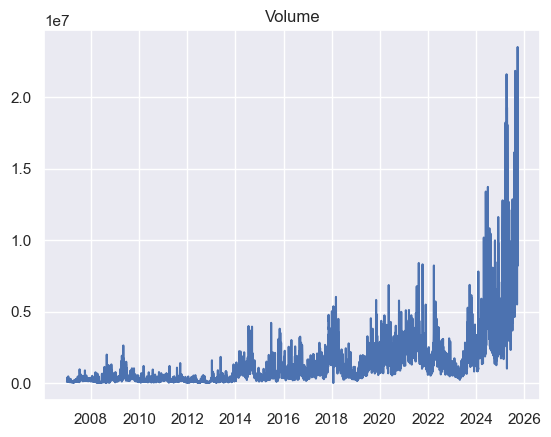

In [ ]:
plt.plot(df['time'], df['volume'])
plt.title('Volume')
plt.show()

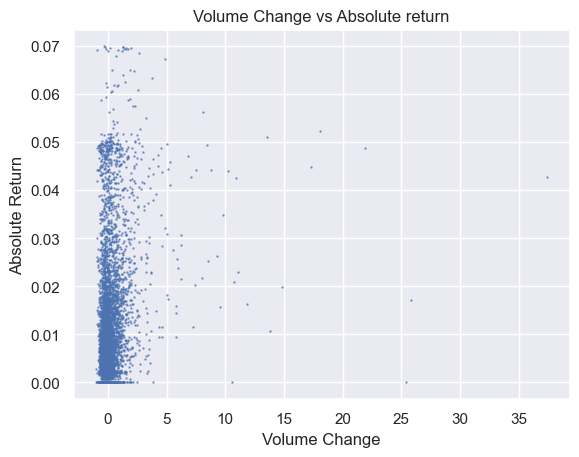

In [ ]:
df['VolChange'] = df['volume'].pct_change()
df['AbsReturn'] = df['return'].abs()

plt.scatter(df['VolChange'], df['AbsReturn'], alpha=0.7, s=0.5)
plt.xlabel('Volume Change')
plt.ylabel('Absolute Return')
plt.title('Volume Change vs Absolute return')
plt.show()

Perfectly inelastic.

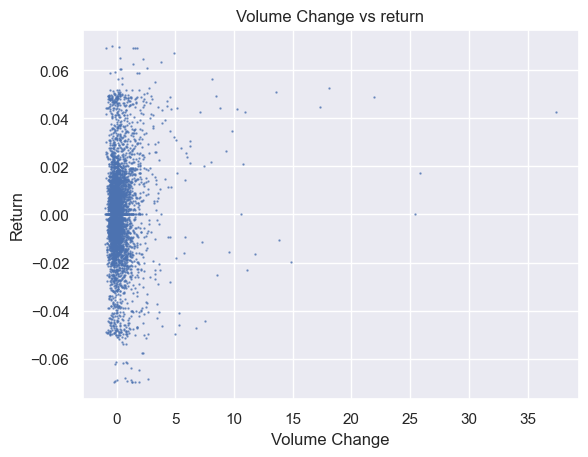

In [ ]:
plt.scatter(df['VolChange'], df['return'], alpha=0.7, s=0.5)
plt.xlabel('Volume Change')
plt.ylabel('Return')
plt.title('Volume Change vs return')
plt.show()

##### 9. Recent trend

In [ ]:
df_recent = df.iloc[3000:]
df_recent.describe(include='number')[['close', 'return', 'log_return']]

,close,return,log_return
count,1665.000000,1665.000000,1665.000000
mean,55.363201,0.001343,0.001195
std,33.656543,0.017186,0.017180
min,13.430000,-0.069896,-0.072459
25%,22.060000,-0.006739,-0.006761
50%,49.260000,0.000935,0.000935
75%,71.950000,0.009503,0.009458
max,133.040000,0.069922,0.067586


Seem still normal with small return gap.

<Axes: xlabel='return', ylabel='Count'>

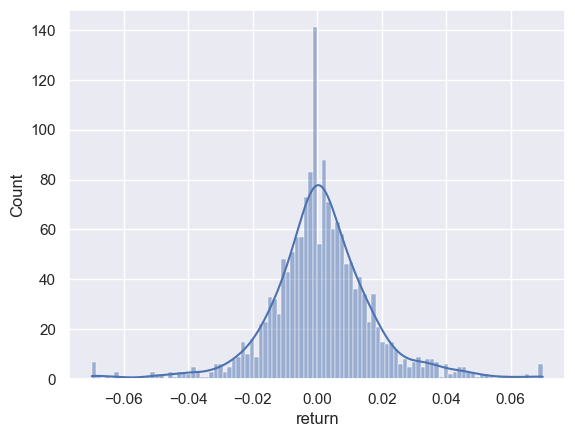

In [ ]:
sns.histplot(df_recent['return'], bins=100, kde=True)

In [ ]:
# Sharpe ratio
sr_VNINDEX = (df_recent['return'].mean() - rf) / df_recent['return'].std()
print(f"Sharpe ratio: {sr_VNINDEX:.2f}")
# Sortino ratio
sr_VNINDEX = (df_recent['return'].mean() - rf) / df_recent[df_recent['return'] < 0]['return'].std()
print(f"Sortino ratio: {sr_VNINDEX:.2f}")
# Max drawdown (MDD)
MDD_VNINDEX = ((df_recent['close'].cummax() - df_recent['close'])/df_recent['close'].cummax()).max()
print(f'MDD ratio: {MDD_VNINDEX*100:.2f}%')

Sharpe ratio: 0.08
Sortino ratio: 0.11
MDD ratio: 33.77%


Still bad return over risk efficiency.

In [ ]:
# ADF
adf_result = adfuller(df_recent['return'])
print(f"ADF test: {adf_result[1]}")

print()

# KPSS
kpss_result = kpss(df_recent['return'], regression='c')
print(f"KPSS test: {kpss_result[1]}")

ADF test: 0.0

KPSS test: 0.1


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



In [ ]:
# ADF
adf_result = adfuller(df_recent['close'])
print(f"ADF test: {adf_result[1]}")

print()

# KPSS
kpss_result = kpss(df_recent['close'], regression='c')
print(f"KPSS test: {kpss_result[1]}")

ADF test: 0.8480051067334977

KPSS test: 0.01


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



Definite non stationary.

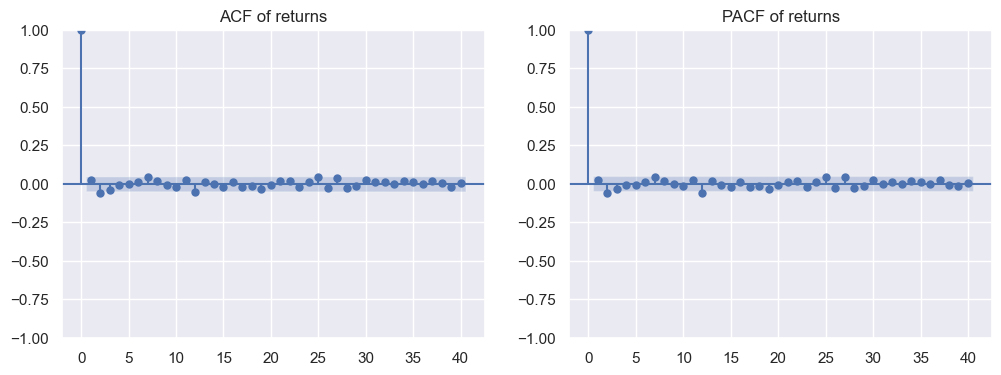

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(df_recent['return'], lags=40, ax=axes[0])
axes[0].set_title('ACF of returns')
plot_pacf(df_recent['return'], lags=40, ax=axes[1])
axes[1].set_title('PACF of returns')
plt.show()

No lag 1 day, a bit higher lag 2 days and 3 days and 12 days which 2-day and 12-day and several other lags is outer band which is significant:
- 2day: mean reversion
- 12day: negative
- 24day: positive

In [ ]:
mu = df_recent['return'].mean()
sigma = df_recent['return'].std()

confidence = 0.95 # 95% confidence level
z = stats.norm.ppf((1 - confidence)) #z-score for 5% left tail (point where 5% falls below)

VaR_95 = mu + sigma * z
print(f"Parametric 95%: {VaR_95*100:.2f}%")

# Histrorical Simulation
Var_95_hist = np.percentile(df_recent['return'], 5) # 5% quantile
print(f"Historical 95%: {Var_95_hist*100:.2f}%")

# Mont Carlo simulation
np.random.seed(42)
simulated = np.random.normal(mu, sigma, size=10000)
VaR_95_mc = np.percentile(simulated, 5)
print(f"Monte Carlo 95% VaR: {VaR_95_mc*100:.2f}%")

Parametric 95%: -2.69%
Historical 95%: -2.39%
Monte Carlo 95% VaR: -2.71%


Smaller VaR. => Return show less worst loss recently.

In [ ]:
CVaR_95 = df_recent[df_recent['return'] <= VaR_95]['return'].mean()
print(f"95% CVaR: {CVaR_95*100:.2f}%")

95% CVaR: -4.33%


In [ ]:
threshold = np.percentile(df_recent['return'], 5) # Historical return
extreme_losses = df_recent[df_recent['return'] <= threshold]['return']

print(f"Tail sample size: {len(extreme_losses)}")
print(f"Tail mean: {extreme_losses.mean()*100:.2f}%") 
print(f"Max loss observed: {extreme_losses.min()*100:.2f}%")

Tail sample size: 84
Tail mean: -3.97%
Max loss observed: -6.99%


In [ ]:
# Day-of-week effect
df_recent['time'] = pd.to_datetime(df_recent['time'])
df_recent['day_of_week'] = df_recent['time'].dt.day_name()

day_mean = df_recent.groupby('day_of_week')['return'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
day_mean


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mean,count
day_of_week,,
Tuesday,0.003014,336
Wednesday,0.002890,333
Friday,0.001350,334
Thursday,0.001173,335
Monday,-0.001782,327


Monday still not change but the others mean has increase higher => More separatable through Monday and not Monday.

#### **III. Conclusion**

Overall:
- Votality stable around 2% while mean close to 0.
- Very positive momentum and might increase further in the future.
- MDD is considerable: 1/3 of the value and worse loss at 95% comfidence is about 3%, recently reduce to 2.5%.  
Modeling:
- Close price still very hard to predict, there is pattern in recent trend but can only be seen recently and not enough data to prove, can test and retrain further in the future.
- Return meet several assumption like normality, stationary.
- Return whole data shows strong lag1 positive momentum.
- Return recent data shows significant 2-day lag, 12-day lag (negative) and 24-day lag(positive).
- Monday show significant different from others.  
=> Features: is_Monday.   
=> ARCH/GARCH for volatility  
=> AR model should not work, return assume at constant value (mean).  
=> LSTM for whole price data for hidden relationship.  
=> Other models: Treebased...